In [2]:
# Import dependencies
from scipy.spatial.distance import pdist, squareform
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, silhouette_score

from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
#Importing the dataset
data = pd.read_csv("iris.csv", index_col=0)
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
# select the features i want to use
X = data[['PetalWidthCm','PetalLengthCm']].values.reshape(-1,2)

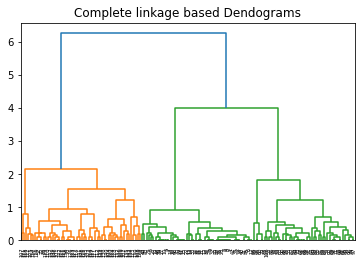

In [5]:
# euclidean complete dendogram
plt.title("Complete linkage based Dendograms")
euc_com = pdist(X, 'euclidean')
dend = dendrogram(linkage(euc_com, method='complete')) 

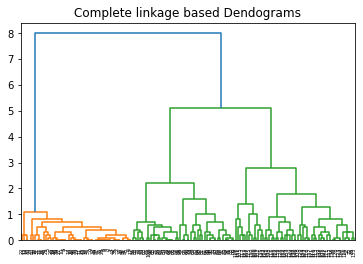

In [6]:
# cityblock complete dendogram
plt.title("Complete linkage based Dendograms")
cty_com = pdist(X, 'cityblock')
dend = dendrogram(linkage(cty_com, method='complete')) 

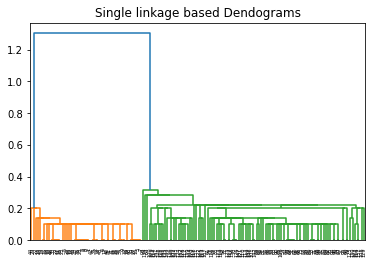

In [7]:
# euclidean single dendogram
plt.title("Single linkage based Dendograms") 
euc_sin = pdist(X, 'euclidean')
dend = dendrogram(linkage(euc_sin, method='single'))

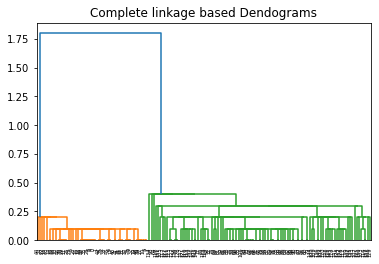

In [8]:
# cityblock single dendogram
plt.title("Complete linkage based Dendograms")
cty_sin = pdist(X, 'cityblock')
dend = dendrogram(linkage(cty_sin, method='single')) 

Ive decided to go forward with the complete euclidean model.

In [9]:
X

array([[0.2, 1.4],
       [0.2, 1.4],
       [0.2, 1.3],
       [0.2, 1.5],
       [0.2, 1.4],
       [0.4, 1.7],
       [0.3, 1.4],
       [0.2, 1.5],
       [0.2, 1.4],
       [0.1, 1.5],
       [0.2, 1.5],
       [0.2, 1.6],
       [0.1, 1.4],
       [0.1, 1.1],
       [0.2, 1.2],
       [0.4, 1.5],
       [0.4, 1.3],
       [0.3, 1.4],
       [0.3, 1.7],
       [0.3, 1.5],
       [0.2, 1.7],
       [0.4, 1.5],
       [0.2, 1. ],
       [0.5, 1.7],
       [0.2, 1.9],
       [0.2, 1.6],
       [0.4, 1.6],
       [0.2, 1.5],
       [0.2, 1.4],
       [0.2, 1.6],
       [0.2, 1.6],
       [0.4, 1.5],
       [0.1, 1.5],
       [0.2, 1.4],
       [0.1, 1.5],
       [0.2, 1.2],
       [0.2, 1.3],
       [0.1, 1.5],
       [0.2, 1.3],
       [0.2, 1.5],
       [0.3, 1.3],
       [0.3, 1.3],
       [0.2, 1.3],
       [0.6, 1.6],
       [0.4, 1.9],
       [0.3, 1.4],
       [0.2, 1.6],
       [0.2, 1.4],
       [0.2, 1.5],
       [0.2, 1.4],
       [1.4, 4.7],
       [1.5, 4.5],
       [1.5,

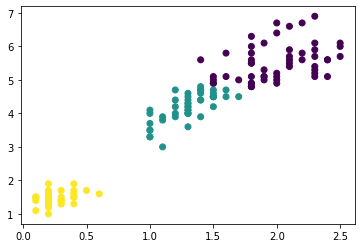

In [10]:
# plotting cluster predictions using complete euclidean model in scatter graph
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='complete')
cluster.fit_predict(X)
plt.scatter(X[:,0], X[:,1], c=cluster.labels_)

In [11]:
score = round(silhouette_score(X, cluster.labels_, metric='euclidean'),2)
print(f'The silhouette score is {score}')

The silhouette score is 0.66


I am confident in my clustering solution as it got the same score as the kmeans one 